In [12]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer,MissingIndicator
from sklearn.compose import ColumnTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import  GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from numpy import argmax
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report

df = pd.read_csv(r"heart_cleaned.csv")
df.drop(columns = ['id','dataset'],inplace = True)

In [13]:
df.drop(columns = ['thal','ca'],inplace = True)

In [14]:
X = df.drop(columns='num', axis = 1)  # or whatever your label is
y = df['num']
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,62,Male,asymptomatic,NaN,170.0,False,st-t abnormality,120.0,True,3.0,NaN
457,54,Male,non-anginal,150.0,NaN,False,normal,122.0,False,0.0,NaN
797,51,Male,non-anginal,NaN,339.0,False,normal,NaN,NaN,NaN,NaN
25,50,Female,non-anginal,120.0,219.0,False,normal,158.0,False,1.6,flat
84,52,Male,atypical angina,120.0,325.0,False,normal,172.0,False,0.2,upsloping
...,...,...,...,...,...,...,...,...,...,...,...
106,59,Male,asymptomatic,140.0,177.0,False,normal,162.0,True,0.0,upsloping
270,61,Male,asymptomatic,140.0,207.0,False,lv hypertrophy,138.0,True,1.9,upsloping
860,75,Male,asymptomatic,160.0,310.0,True,normal,112.0,True,2.0,downsloping
435,53,Female,atypical angina,140.0,216.0,False,normal,142.0,True,2.0,flat


In [15]:
si = SimpleImputer(strategy = 'most_frequent')
X_train[['restecg' ,'exang','fbs','slope']] = si.fit_transform(X_train[['restecg' ,'exang','fbs','slope']])
X_test[['restecg' ,'exang','fbs','slope']] = si.transform(X_test[['restecg' ,'exang','fbs','slope']])

In [16]:
scale_columns = ['age','trestbps', 'chol' ,'thalch', 'oldpeak']
ss = StandardScaler()
X_train[scale_columns]  = ss.fit_transform(X_train[scale_columns])
X_test[scale_columns]  = ss.transform(X_test[scale_columns])


In [17]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope
880,0.902413,Male,asymptomatic,NaN,-1.360203,False,st-t abnormality,-0.676174,True,1.989372,flat
457,0.034776,Male,non-anginal,0.976363,NaN,False,normal,-0.598702,False,-0.828147,flat
797,-0.290587,Male,non-anginal,NaN,1.697387,False,normal,NaN,False,NaN,flat
25,-0.399042,Female,non-anginal,-0.639847,-0.473683,False,normal,0.795789,False,0.674530,flat
84,-0.182133,Male,atypical angina,-0.639847,1.444096,False,normal,1.338091,False,-0.640312,upsloping
...,...,...,...,...,...,...,...,...,...,...,...
106,0.577049,Male,asymptomatic,0.437626,-1.233557,False,normal,0.950732,True,-0.828147,upsloping
270,0.793958,Male,asymptomatic,0.437626,-0.690790,False,lv hypertrophy,0.021071,True,0.956282,upsloping
860,2.312322,Male,asymptomatic,1.515099,1.172712,True,normal,-0.986061,True,1.050199,downsloping
435,-0.073678,Female,atypical angina,0.437626,-0.527959,False,normal,0.176015,True,1.050199,flat


In [18]:
cp_order =  [['typical angina', 'atypical angina', 'non-anginal', 'asymptomatic']]
slope_order = [['upsloping', 'flat', 'downsloping']]
thal_order =  [['normal', 'fixed defect', 'reversable defect']]
restecg_order =  [['normal','st-t abnormality','lv hypertrophy']]

#Ordinal Encoder 
ordinal_cp = OrdinalEncoder(categories=cp_order, handle_unknown='use_encoded_value',unknown_value = np.nan , dtype=float)
ordinal_slope = OrdinalEncoder(categories=slope_order, handle_unknown='use_encoded_value', unknown_value = np.nan, dtype=float)
ordinal_restecg = OrdinalEncoder(categories= restecg_order,handle_unknown='use_encoded_value',unknown_value = np.nan, dtype=float)

def map_custom_categories(X):
    X = X.copy()
    
    sex_mapping = {'Female': 0 ,'Male': 1}
    
    exang_mapping = {False: 0,True: 1}

    fbs_mapping = {False: 0,True: 1}   


    X['sex'] = X['sex'].map(sex_mapping)
    X['exang'] = X['exang'].map(exang_mapping)
    X['fbs'] = X['fbs'].map(fbs_mapping)
 
    return X

binary_mapping = FunctionTransformer(map_custom_categories)

restecg_pipeline = Pipeline(steps=[("impute", SimpleImputer(strategy="most_frequent")),("encoding", ordinal_restecg)])
cp_encode = ordinal_cp
slope_encode = ordinal_slope


encoding_cat = ColumnTransformer(transformers=[
    ('restecg_pipeline', restecg_pipeline,['restecg']),
    ('binary_encoding',binary_mapping, ['sex','exang','fbs']),
    ('cp_encoding', cp_encode, ['cp']),
    ('slope_encoding',slope_encode, ['slope']),
 ], remainder='passthrough',verbose_feature_names_out = False)



encoding_cat.set_output(transform='pandas')

X_train_transformed = encoding_cat.fit_transform(X_train)
X_test_transformed = encoding_cat.transform(X_test)

In [19]:
order = X_train.columns
X_train_encoded = X_train_transformed[order]
X_test_encoded = X_test_transformed[order]

In [20]:
X_train_encoded.isnull().sum()

age           0
sex           0
cp            0
trestbps     46
chol        164
fbs           0
restecg       0
thalch       42
exang         0
oldpeak      45
slope         0
dtype: int64

In [21]:
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.set_output(transform = 'pandas')
knn_features = [ 'trestbps', 'thalch', 'oldpeak'] #'age', 'restecg', 'trestbps', 'thalch', 'oldpeak', 'exang'
impute_targets = ['trestbps', 'thalch', 'oldpeak']

# 3a. Fit on train, transform both train and test
X_train_knn = X_train_encoded[knn_features].copy()
X_test_knn = X_test_encoded[knn_features].copy()

X_train_knn_imputed = knn_imputer.fit_transform(X_train_knn)
                                

X_test_knn_imputed = knn_imputer.transform(X_test_knn)

# Replace imputed targets in original train/test sets
X_train_encoded[impute_targets] = X_train_knn_imputed[impute_targets]
X_test_encoded[impute_targets] = X_test_knn_imputed[impute_targets]





In [22]:
# Select columns for imputation
features_for_chol = ['chol','age' , 'sex' , 'fbs', 'thalch', 'age','cp','restecg']

X_train_chol = X_train_encoded[features_for_chol].copy()
X_test_chol = X_test_encoded[features_for_chol].copy()

chol_imputer = IterativeImputer(estimator=RandomForestRegressor(n_estimators=10, random_state=0),
                                max_iter=10,
                                random_state=0)

# Fit on training data
X_train_chol_imputed = chol_imputer.fit_transform(X_train_chol)

# Transform test data using the same fitted imputer
X_test_chol_imputed = chol_imputer.transform(X_test_chol)

# Replace only 'chol' in X_train_transformed and X_test_transformed
X_train_encoded.loc[:, 'chol'] = X_train_chol_imputed[:, 0]
X_test_encoded.loc[:, 'chol'] = X_test_chol_imputed[:, 0]



<Axes: xlabel='trestbps', ylabel='Density'>

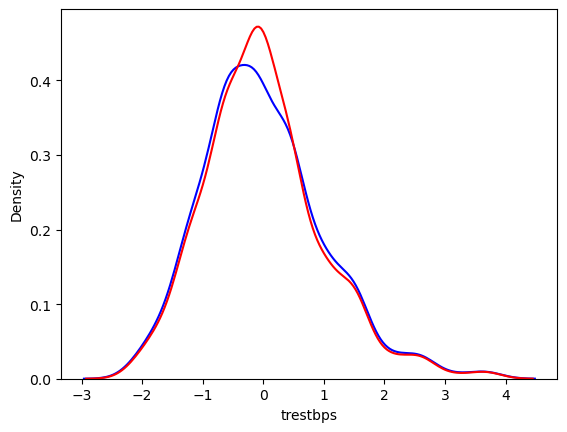

In [23]:
sns.kdeplot(X_train['trestbps'],color = "blue")
sns.kdeplot(X_train_encoded['trestbps'],color = "red")

<Axes: xlabel='chol', ylabel='Density'>

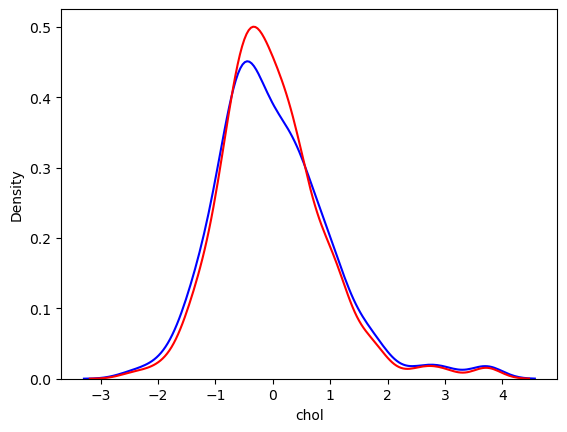

In [24]:
sns.kdeplot(X_train['chol'],color = "blue")
sns.kdeplot(X_train_encoded['chol'],color = "red")

<Axes: xlabel='thalch', ylabel='Density'>

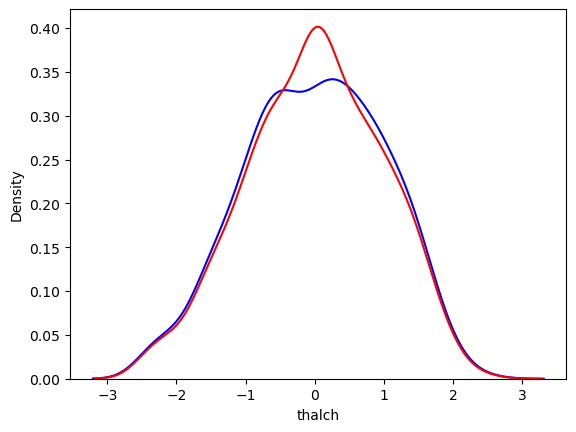

In [25]:
sns.kdeplot(X_train['thalch'],color = "blue")
sns.kdeplot(X_train_encoded['thalch'],color = "red")

<Axes: xlabel='oldpeak', ylabel='Density'>

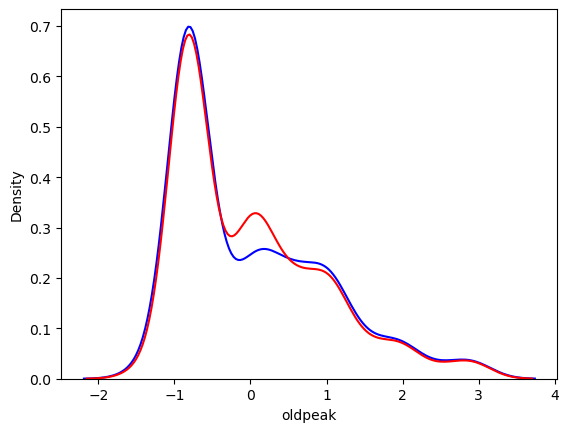

In [26]:
sns.kdeplot(X_train['oldpeak'],color = "blue")
sns.kdeplot(X_train_encoded['oldpeak'],color = "red")

In [27]:
X_train_encoded.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
dtype: int64

In [28]:

X_train_transformed = X_train_encoded 
X_test_transformed  = X_test_encoded 

## Default Logistic Regression

In [29]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

simplelog = LogisticRegression()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print(cv)
score = cross_val_score(simplelog , X_train_transformed , y_train , cv = cv , scoring='accuracy')

print(score)

print(np.mean(score))



StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
[0.77027027 0.78231293 0.82312925 0.80272109 0.78911565]
0.7935098363669792


## Tuned Logistic Regression

In [30]:

# Identify your features
categorical_features = ['cp','restecg']
numerical_features = list(set(X_train.columns) - set(categorical_features))

# ColumnTransformer: Apply OneHot to categorical, scaling to numerical
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
] , remainder = 'passthrough')

# Full pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, C= 0.2 ,solver='lbfgs',penalty='l2'))
])


# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store best thresholds and scores
gmean_scores = []
thresholds_list = []
accuracy = []
threshold_90_scores =[]
accuracy_thresh = []

for train_idx, val_idx in cv.split(X_train_transformed, y_train):
    X_train_fold, X_val_fold = X_train_transformed.iloc[train_idx], X_train_transformed.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit model on train fold
    pipeline.fit(X_train_fold, y_train_fold)
    accuracy.append(pipeline.score(X_val_fold ,y_val_fold))

    
    # Predict probabilities on validation fold
    y_probs_val = pipeline.predict_proba(X_val_fold)[:, 1]


    fpr, tpr, thresholds = roc_curve(y_val_fold, y_probs_val)
    desired_tpr = 0.90
    

    for i, t in enumerate(thresholds):
        if tpr[i] >= desired_tpr:
            thresholds_list.append(thresholds[i])
            print(f"✅ Threshold achieving TPR ≥ {desired_tpr}: {thresholds[i]:.3f}")
            break

    y_val_prob  = pipeline.predict_proba(X_val_fold)[:, 1]
    y_val_pred = (y_val_prob >= thresholds[i]).astype(int)
    accuracy_thresh.append(accuracy_score(y_val_pred , y_val_fold))
    
print(accuracy_thresh)
print(np.mean(accuracy_thresh))


✅ Threshold achieving TPR ≥ 0.9: 0.391
✅ Threshold achieving TPR ≥ 0.9: 0.406
✅ Threshold achieving TPR ≥ 0.9: 0.390
✅ Threshold achieving TPR ≥ 0.9: 0.472
✅ Threshold achieving TPR ≥ 0.9: 0.319
[0.7905405405405406, 0.8095238095238095, 0.8231292517006803, 0.8367346938775511, 0.8163265306122449]
0.8152509652509652



 Final Best Threshold (Avg of CV folds): 0.396

 Train Accuracy (using tuned threshold): 0.8098

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.69      0.77       336
           1       0.78      0.91      0.84       400

    accuracy                           0.81       736
   macro avg       0.82      0.80      0.80       736
weighted avg       0.82      0.81      0.81       736



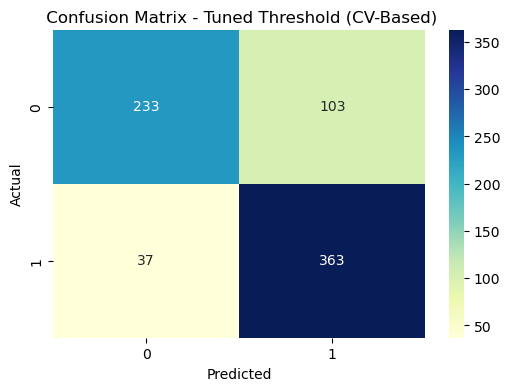


 Final Best Threshold (Avg of CV folds): 0.396

 Test Accuracy (using tuned threshold): 0.8370

 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        75
           1       0.83      0.91      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.82      0.83       184
weighted avg       0.84      0.84      0.83       184



C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


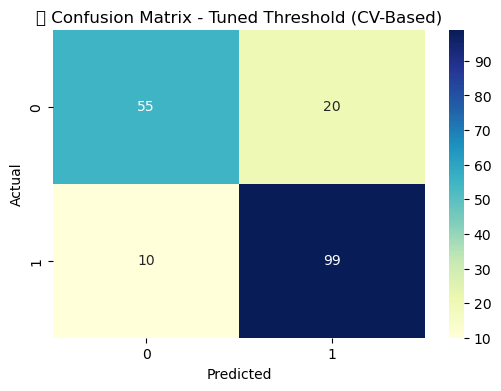

In [31]:

# Final best threshold: average of best thresholds from CV folds

final_best_threshold = np.mean(thresholds_list)
print(f"\n Final Best Threshold (Avg of CV folds): {final_best_threshold:.3f}")

# ---- Final Model Fit & Evaluation on Test Set ----
pipeline.fit(X_train_transformed, y_train)

# Predict probabilities on test set
y_probs_train = pipeline.predict_proba(X_train_transformed)[:, 1]

# Predict using best threshold
y_pred_best = (y_probs_train >= final_best_threshold).astype(int)

# Confusion Matrix and Accuracy
cm_best = confusion_matrix(y_train, y_pred_best)
acc_best = accuracy_score(y_train, y_pred_best)

print(f"\n Train Accuracy (using tuned threshold): {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_train, y_pred_best))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title(" Confusion Matrix - Tuned Threshold (CV-Based)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#  Final best threshold: average of best thresholds from CV folds
final_best_threshold = np.mean(thresholds_list)
print(f"\n Final Best Threshold (Avg of CV folds): {final_best_threshold:.3f}")

# Predict probabilities on test set
y_probs_test = pipeline.predict_proba(X_test_transformed)[:, 1]

# Predict using best threshold
y_pred_best = (y_probs_test >= final_best_threshold).astype(int)

# Confusion Matrix and Accuracy
cm_best = confusion_matrix(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"\n Test Accuracy (using tuned threshold): {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title("🔍 Confusion Matrix - Tuned Threshold (CV-Based)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



 Final Best Threshold (Avg of CV folds): 0.517

 Test Accuracy (using tuned threshold): 0.8302

 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       336
           1       0.84      0.85      0.85       400

    accuracy                           0.83       736
   macro avg       0.83      0.83      0.83       736
weighted avg       0.83      0.83      0.83       736



C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


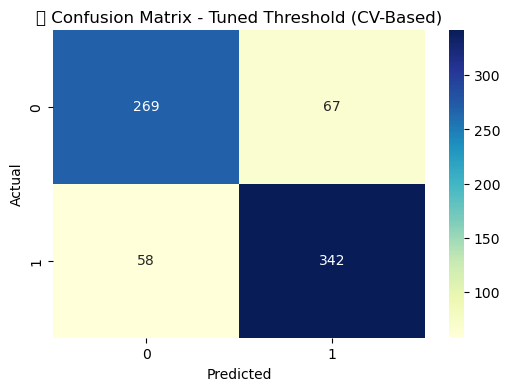


 Final Best Threshold (Avg of CV folds): 0.517

 Test Accuracy (using tuned threshold): 0.8370

 Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        75
           1       0.88      0.84      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



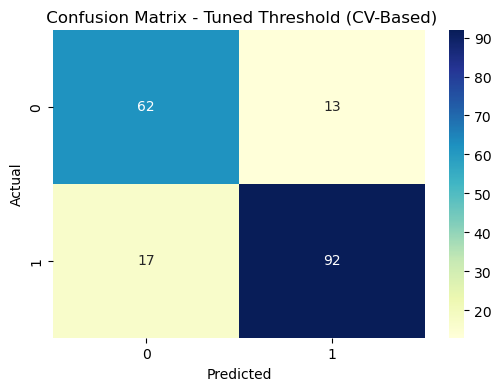

In [32]:

# Identify your features
categorical_features = ['cp','restecg']
numerical_features = list(set(X_train.columns) - set(categorical_features))

# ColumnTransformer: Apply OneHot to categorical, scaling to numerical
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
] , remainder = 'passthrough')

# Full pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('clf', LogisticRegression(max_iter=1000, C=0.1,solver='lbfgs',penalty='l2'))
])


# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store best thresholds and scores
gmean_scores = []
thresholds_list = []
accuracy = []
threshold_90_scores =[]
accuracy_thresh = []

for train_idx, val_idx in cv.split(X_train_transformed, y_train):
    X_train_fold, X_val_fold = X_train_transformed.iloc[train_idx], X_train_transformed.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit model on train fold
    pipeline.fit(X_train_fold, y_train_fold)
    accuracy.append(pipeline.score(X_val_fold ,y_val_fold))

    
    # Predict probabilities on validation fold
    y_probs_val = pipeline.predict_proba(X_val_fold)[:, 1]

    # Compute ROC & G-Mean
    fpr, tpr, thresholds = roc_curve(y_val_fold, y_probs_val)
    desired_tpr = 0.90
    
    # You can also try 0.93, 0.97 etc.
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    thresholds_list.append(thresholds[optimal_idx])
    
    y_val_prob  = pipeline.predict_proba(X_val_fold)[:, 1]
    y_val_pred = (y_val_prob >= optimal_threshold).astype(int)
    accuracy_thresh.append(accuracy_score(y_val_pred , y_val_fold))
    


# Final best threshold: average of best thresholds from CV folds
final_best_threshold = np.mean(thresholds_list)
print(f"\n Final Best Threshold (Avg of CV folds): {final_best_threshold:.3f}")

# ---- Final Model Fit & Evaluation on Test Set ----
pipeline.fit(X_train_transformed, y_train)

# Predict probabilities on test set
y_probs_train = pipeline.predict_proba(X_train_transformed)[:, 1]

# Predict using best threshold
y_pred_best = (y_probs_train >= final_best_threshold).astype(int)

# Confusion Matrix and Accuracy
cm_best = confusion_matrix(y_train, y_pred_best)
acc_best = accuracy_score(y_train, y_pred_best)

print(f"\n Test Accuracy (using tuned threshold): {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_train, y_pred_best))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title("🔍 Confusion Matrix - Tuned Threshold (CV-Based)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#  Final best threshold: average of best thresholds from CV folds
final_best_threshold = np.mean(thresholds_list)
print(f"\n Final Best Threshold (Avg of CV folds): {final_best_threshold:.3f}")

# Predict probabilities on test set
y_probs_test = pipeline.predict_proba(X_test_transformed)[:, 1]

# Predict using best threshold
y_pred_best = (y_probs_test >= final_best_threshold).astype(int)

# Confusion Matrix and Accuracy
cm_best = confusion_matrix(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"\n Test Accuracy (using tuned threshold): {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title(" Confusion Matrix - Tuned Threshold (CV-Based)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


✅ Threshold achieving TPR ≥ 0.9: 0.244
✅ Threshold achieving TPR ≥ 0.9: 0.383
✅ Threshold achieving TPR ≥ 0.9: 0.421
✅ Threshold achieving TPR ≥ 0.9: 0.405
✅ Threshold achieving TPR ≥ 0.9: 0.253

 Final Best Threshold (Avg of CV folds): 0.341

 Test Accuracy (using tuned threshold): 0.8478

 Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        75
           1       0.84      0.92      0.88       109

    accuracy                           0.85       184
   macro avg       0.85      0.83      0.84       184
weighted avg       0.85      0.85      0.85       184



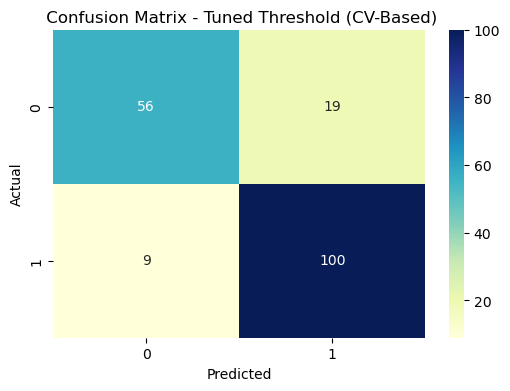

In [33]:

# Identify your features
categorical_features = ['cp','restecg']
numerical_features = list(set(X_train.columns) - set(categorical_features))

# ColumnTransformer: Apply OneHot to categorical, scaling to numerical
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Full pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('clf', LogisticRegression(max_iter=1000, C=0.1,solver='lbfgs',penalty='l2'))
])


# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store best thresholds and scores
gmean_scores = []
thresholds_list = []
accuracy = []
threshold_90_scores =[]

for train_idx, val_idx in cv.split(X_train_transformed, y_train):
    X_train_fold, X_val_fold = X_train_transformed.iloc[train_idx], X_train_transformed.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Fit model on train fold
    pipeline.fit(X_train_fold, y_train_fold)
    accuracy.append(pipeline.score(X_val_fold ,y_val_fold))

    
    # Predict probabilities on validation fold
    y_probs_val = pipeline.predict_proba(X_val_fold)[:, 1]

    # Compute ROC & G-Mean
    fpr, tpr, thresholds = roc_curve(y_val_fold, y_probs_val)
    desired_tpr = 0.90  # You can also try 0.93, 0.97 etc.
    for i, t in enumerate(thresholds):
        if tpr[i] >= desired_tpr:
            thresholds_list.append(thresholds[i])
            print(f"✅ Threshold achieving TPR ≥ {desired_tpr}: {thresholds[i]:.3f}")
            break

#  Final best threshold: average of best thresholds from CV folds
final_best_threshold = np.mean(thresholds_list)
print(f"\n Final Best Threshold (Avg of CV folds): {final_best_threshold:.3f}")

# ---- Final Model Fit & Evaluation on Test Set ----
pipeline.fit(X_train_transformed, y_train)

# Predict probabilities on test set
y_probs_test = pipeline.predict_proba(X_test_transformed)[:, 1]

# Predict using best threshold
y_pred_best = (y_probs_test >= final_best_threshold).astype(int)

# Confusion Matrix and Accuracy
cm_best = confusion_matrix(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"\n Test Accuracy (using tuned threshold): {acc_best:.4f}")
print("\n Classification Report:")
print(classification_report(y_test, y_pred_best))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title(" Confusion Matrix - Tuned Threshold (CV-Based)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


CV Fold Accuracies: [0.74324324 0.78231293 0.82993197 0.78231293 0.76190476]
Mean Accuracy: 0.7799411656554514
Train Accuracy: 0.8274456521739131
Test Accuracy: 0.8369565217391305


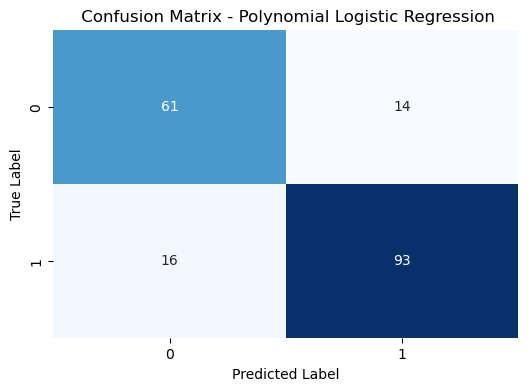


 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        75
           1       0.87      0.85      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Identify your features
categorical_features = ['cp','restecg']
numerical_features = list(set(X_train.columns) - set(categorical_features))

# ColumnTransformer: Apply OneHot to categorical, scaling to numerical
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

# Full pipeline
pipeline = Pipeline([
    ('pre', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('clf', LogisticRegression(max_iter=1000, C=0.1,solver='lbfgs',penalty='l2'))
])

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train_transformed, y_train, cv=cv, scoring='accuracy')

print("CV Fold Accuracies:", scores)
print("Mean Accuracy:", scores.mean())

# Fit and evaluate
pipeline.fit(X_train_transformed, y_train)
print("Train Accuracy:", pipeline.score(X_train_transformed, y_train))
print("Test Accuracy:", pipeline.score(X_test_transformed, y_test))

# Predict on test set
y_pred = pipeline.predict(X_test_transformed)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(" Confusion Matrix - Polynomial Logistic Regression")
plt.show()

# Optional: Detailed Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred))



 Best Threshold (by G-Mean): 0.539
 G-Mean at Best Threshold: 0.849

 Accuracy (after threshold tuning): 0.8478

 Classification Report (Best Threshold):
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.89      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



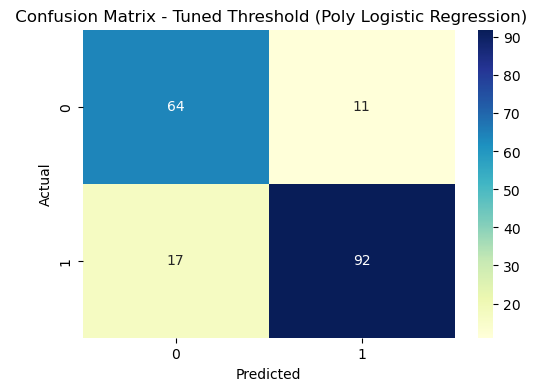

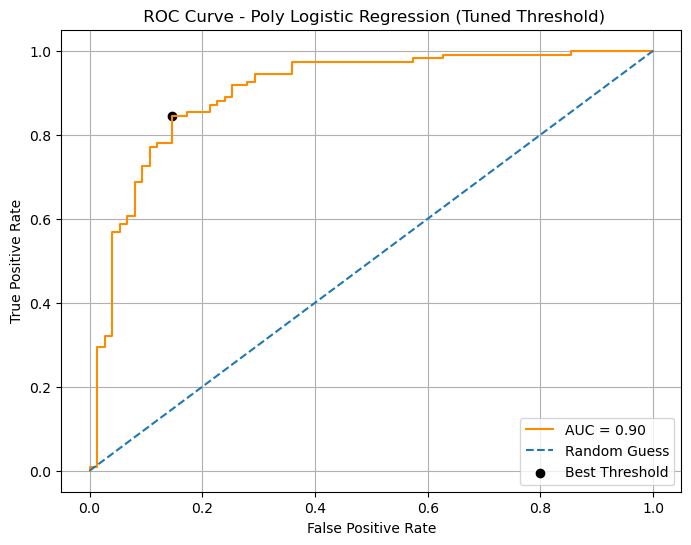

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score, classification_report
from numpy import sqrt, argmax
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict Probabilities
y_probs = pipeline.predict_proba(X_test_transformed)[:, 1]

# Step 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Step 3: G-Mean Calculation
gmeans = sqrt(tpr * (1 - fpr))
ix = argmax(gmeans)
best_thresh = thresholds[ix]
print(f"\n Best Threshold (by G-Mean): {best_thresh:.3f}")
print(f" G-Mean at Best Threshold: {gmeans[ix]:.3f}")

# Step 4: Predict using Best Threshold
y_pred_best = (y_probs >= best_thresh).astype(int)

# Step 5: Confusion Matrix and Accuracy
cm_best = confusion_matrix(y_test, y_pred_best)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"\n Accuracy (after threshold tuning): {acc_best:.4f}")
print("\n Classification Report (Best Threshold):")
print(classification_report(y_test, y_pred_best))

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlGnBu')
plt.title(" Confusion Matrix - Tuned Threshold (Poly Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: ROC Curve Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_probs):.2f}', color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', label='Random Guess')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" ROC Curve - Poly Logistic Regression (Tuned Threshold)")
plt.legend(loc='lower right')
plt.grid()
plt.show()
